In [2]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline

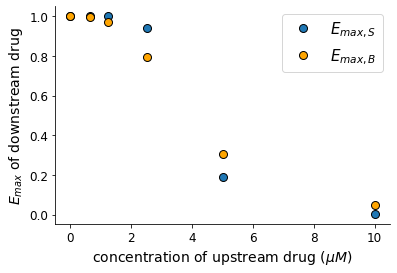

In [19]:
## Bep+Ser
Bep = [0,0.63,1.25,2.5,5,10]
Ser = [0,0.63,1.25,2.5,5,10]
Emax_S = [1,1,0.999,0.939,0.1899,0.0036]
Emax_B = [1,0.9966,0.9718,0.7955,0.3053,0.0473]
IC50_S = [3.85,3.190,2.718,0.8577,0.314]
IC50_B = [3.932,2.664,2.189,1.598,0.737]
Hill_S = [3.146,3.157,3.124,1.916,1.902]
Hill_B = [6.038, 5.27, 3.925, 4.373, 2.541]

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Bep, Emax_S, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', markersize = 8, label = '$E_{max,S}$')
ax1.plot(Ser, Emax_B, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$E_{max,B}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$E_{max}$ of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

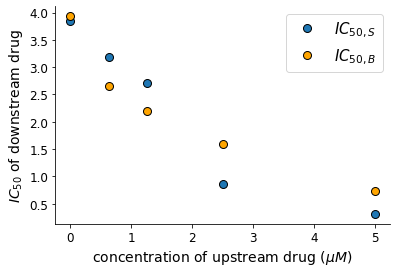

In [21]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Bep[0:5], IC50_S, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$IC_{50,S}$')
ax1.plot(Ser[0:5], IC50_B, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$IC_{50,B}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$IC_{50}$ of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

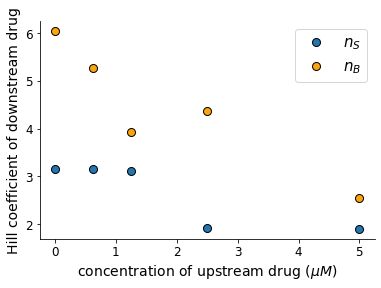

In [22]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Bep[0:5], Hill_S, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$n_{S}$')
ax1.plot(Ser[0:5], Hill_B, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$n_{B}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('Hill coefficient of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

In [23]:
## Tor+Ser
Tor = [0,0.31,0.63,1.25,2.5,5]
Ser = [0,0.63,1.25,2.5,5,10]
Emax_S = [1, 0.9257, 0.7768, 0.5036, 0.2257, 0.0773]
Emax_T = [1, 0.987, 0.9102, 0.5681, 0.1459, 0.0217]
IC50_S = [2.744, 1.574, 0.946, 0.617, 0.483, 1.160]
IC50_T = [1.26, 0.76,0.467,0.293,0.422]
Hill_S = [2.945,1.880,1.926,2.396,2.681,0.159]
Hill_T = [1.799,1.58,1.69,3.5,0.753]

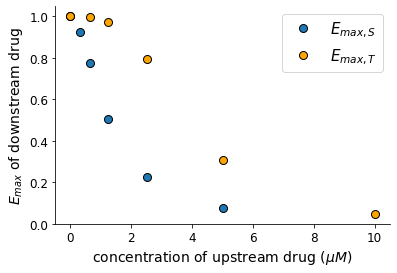

In [24]:
fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Tor, Emax_S, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', markersize = 8, label = '$E_{max,S}$')
ax1.plot(Bep, Emax_B, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$E_{max,T}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$E_{max}$ of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

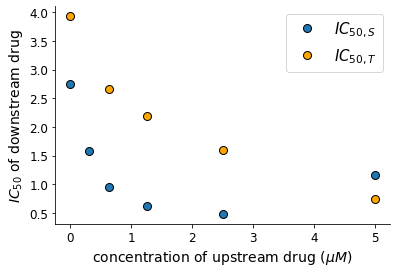

In [25]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Tor, IC50_S, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$IC_{50,S}$')
ax1.plot(Ser[0:5], IC50_B, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$IC_{50,T}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$IC_{50}$ of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

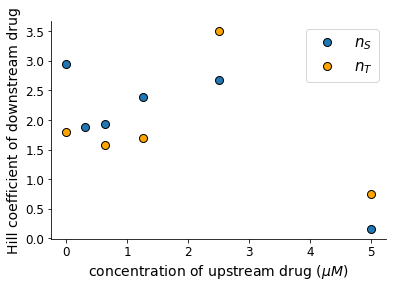

In [26]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Tor, Hill_S, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$n_{S}$')
ax1.plot(Ser[0:5], Hill_T, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$n_{T}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('Hill coefficient of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

In [27]:
## Rem+Nit
Rem = [0,0.63,1.25,2.5,5,10]
Nit = [0,0.63,1.25,2.5,5,10]
Emax_N = [1, 0.9999,0.9992,0.9902,0.8914,0.3992]
Emax_R = [1,0.9893,0.9608,0.8666,0.6323,0.3129]
IC50_N = [6.634, 6.546,4.581,4.168,3.174]
IC50_R = [8.934,8.44,5.163,2.436,3.650]
Hill_N = [1.917,1.141,1.147,1.032,0.956]
Hill_R = [3.626,4.089,4.073,0.887,1.748]

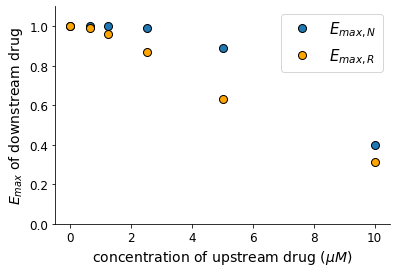

In [32]:
fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Rem, Emax_N, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', markersize = 8, label = '$E_{max,N}$')
ax1.plot(Nit, Emax_R, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$E_{max,R}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$E_{max}$ of downstream drug', fontsize=14)
ax1.set_ylim([0,1.1])
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

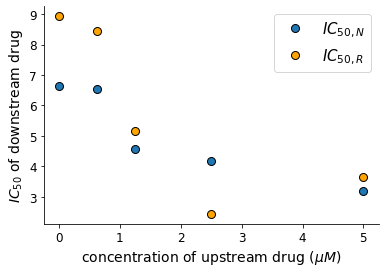

In [29]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Rem[0:5], IC50_N, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$IC_{50,N}$')
ax1.plot(Nit[0:5], IC50_R, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$IC_{50,R}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$IC_{50}$ of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

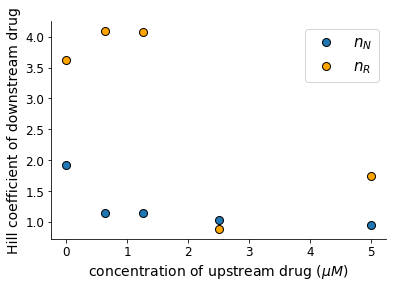

In [30]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Rem[0:5], Hill_N, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$n_{N}$')
ax1.plot(Nit[0:5], Hill_R, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$n_{R}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('Hill coefficient of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

In [35]:
## Arb+Nit
Arb = [0,0.63,1.25,2.5,5,10]
Nit = [0,0.63,1.25,2.5,5,10]
Emax_N = [1,0.9998,0.9985,0.9891,0.9266, 0.6378]
Emax_A = [1,0.9893,0.9608,0.8664,0.632, 0.3129]
IC50_N = [6.634,9.106,8.301,7.46,4.021]
IC50_A = [12.2,7.43,6.145,5.58,6.76]
Hill_N = [1.917,1.623,1.34,1.2,1.298]
Hill_A = [2.843,5.395,8.23,4.43,2.99]

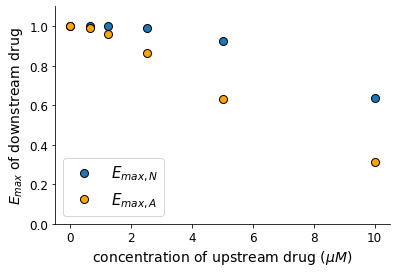

In [36]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Arb, Emax_N, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', markersize = 8, label = '$E_{max,N}$')
ax1.plot(Nit, Emax_A, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$E_{max,A}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$E_{max}$ of downstream drug', fontsize=14)
ax1.set_ylim([0,1.1])
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })


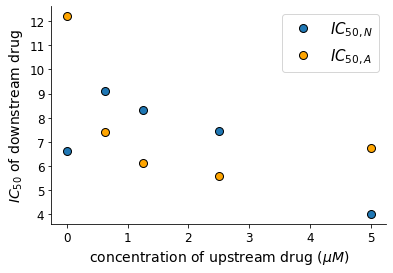

In [37]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Arb[0:5], IC50_N, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$IC_{50,N}$')
ax1.plot(Nit[0:5], IC50_A, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$IC_{50,A}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('$IC_{50}$ of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })

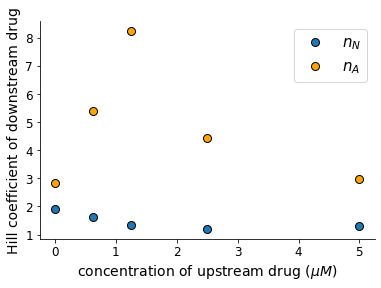

In [38]:

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(Arb[0:5], Hill_N, 'o', markerfacecolor = 'tab:blue', markeredgecolor = 'k', 
         markersize = 8, label = '$n_{N}$')
ax1.plot(Nit[0:5], Hill_A, 'o', color = 'orange', markeredgecolor = 'k', markersize = 8,label = '$n_{A}$')
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_ylabel('Hill coefficient of downstream drug', fontsize=14)
ax1.set_xlabel('concentration of upstream drug ($\mu M$)', fontsize=14)
ax1.tick_params(axis="x", labelsize = 12)
ax1.tick_params(axis="y", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(prop = { "size": 15 })